# Imports

In [184]:
# System Imports
import os

# Data Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy as sp
import cv2

# Deep Learning Framework
import tensorflow as tf

# import helper_functions as hf

In [185]:
# SSL
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [186]:
# Helper Functions

# Function that plots accuracy and loss of training and validation sets

def plot_history(history, epochs=10):
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(16, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

def plot_actual_prediction(model, categories, validation_set):

    plt.figure(figsize=(20, 10))
    for images, labels in validation_set.take(1):
        for i in range(15):
            ax = plt.subplot(3, 5, i + 1)
            
            img_array = images[i].numpy().astype("uint8")
            prediction = model.predict(np.array([img_array]))
            prediction_name = categories[np.argmax(prediction)]
            real_name = categories[np.argmax(labels[i])]
            
            plt.imshow(img_array)
            if prediction_name == real_name:
                plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'g'})
            else:
                plt.title(f'real: {real_name}\npred:{prediction_name}', fontdict={'color': 'r'})
            
            plt.axis("off")

## Reading in Images

In [187]:
# Setting paths

train_data_path = './data/archive/train'
test_data_path = './data/archive/test'

In [188]:
# Viewing categories

categories = os.listdir(train_data_path)
print(f"The categories are: {categories}")

The categories are: ['daisy', 'rose', 'tulip', 'dandelion', 'sunflower']


In [189]:
# Configurations

SEED = 0
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.20

In [190]:
# Creating the training set

training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    class_names=categories
)

Found 2746 files belonging to 5 classes.
Using 2197 files for training.


In [191]:
# Creating the validation set

validation_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_path,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    class_names=categories
)

Found 2746 files belonging to 5 classes.
Using 549 files for validation.


## Plotting Images

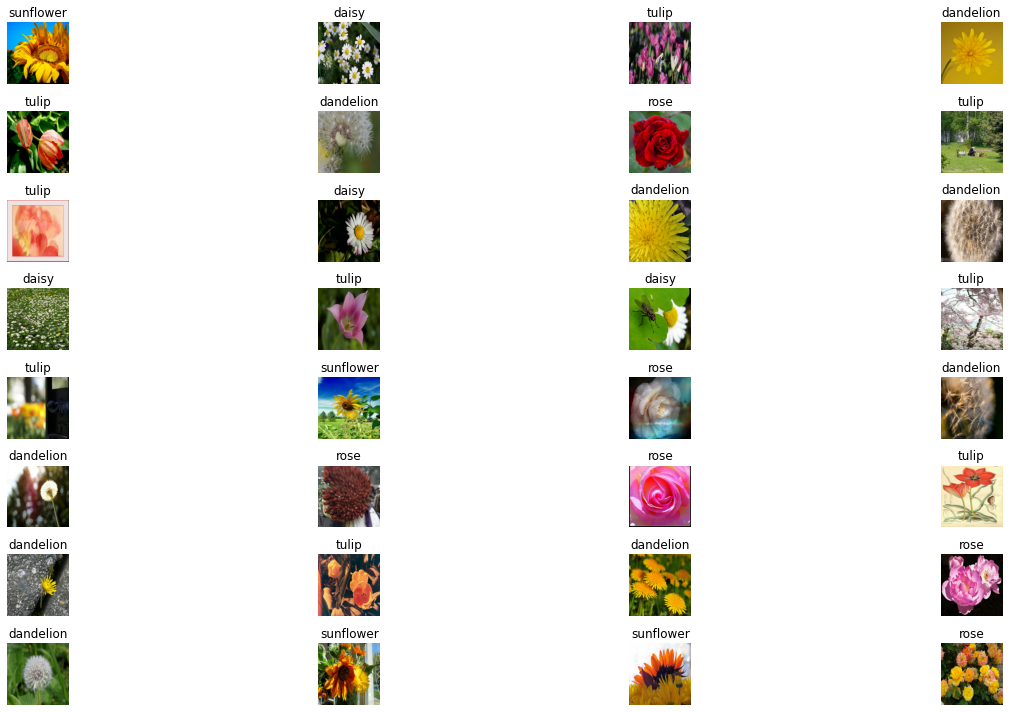

In [192]:
# Plotting some images

plt.figure(figsize=(20, 10))

for images, labels in training_set.take(1): # take(1): takes first batch from generator 
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(categories[np.argmax(labels[i])])
        plt.axis("off")
plt.tight_layout()
plt.show()

# Modeling

In [193]:
# Function that creates a model

def get_baseline_model(): 

    ## Clearing backend
    tf.keras.backend.clear_session()

    ## Input Layer
    inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

    # Rescaling the images
    x = tf.keras.layers.Rescaling(1./255)(inputs)

    ## First CNN
    x = tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3,3),
        strides=(1,1),
        activation='relu',
    )(x)

    x = tf.keras.layers.MaxPool2D(
        pool_size=(2, 2)
    )(x)

    ## Second CNN
    x = tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3,3),
        strides=(1,1),
        activation='relu',
    )(x)

    x = tf.keras.layers.MaxPool2D(
        pool_size=(2, 2)
    )(x)

    ## Third CNN
    x = tf.keras.layers.Conv2D(
        filters=128,
        kernel_size=(3,3),
        strides=(1,1),
        activation='relu',
    )(x)

    x = tf.keras.layers.MaxPool2D(
        pool_size=(2, 2)
    )(x)

    ## Flatten layer
    x = tf.keras.layers.Flatten()(x)

    ## First Dense layer
    x = tf.keras.layers.Dense(
        units=64,
        activation='relu'
    )(x)

    ## Output
    outputs = tf.keras.layers.Dense(
        units=len(categories),
        activation='softmax'
    )(x)

    ## Creating Model
    model = tf.keras.Model(
        inputs=inputs,
        outputs=outputs
    )

    ## Compiling the model
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )

    ## Viewing the architecture
    model.summary()

    return model

In [194]:
# Training the model

baseline_model = get_baseline_model()

EPOCHS = 10
history = baseline_model.fit(
  training_set,
  validation_data=validation_set,
  epochs=EPOCHS
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                         

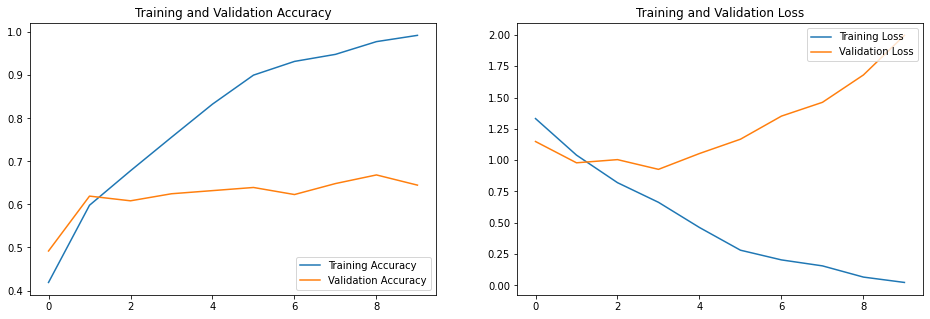

In [195]:
# Viewing the results of the training

plot_history(history)

1/1 [==============================] - 0s 24ms/step


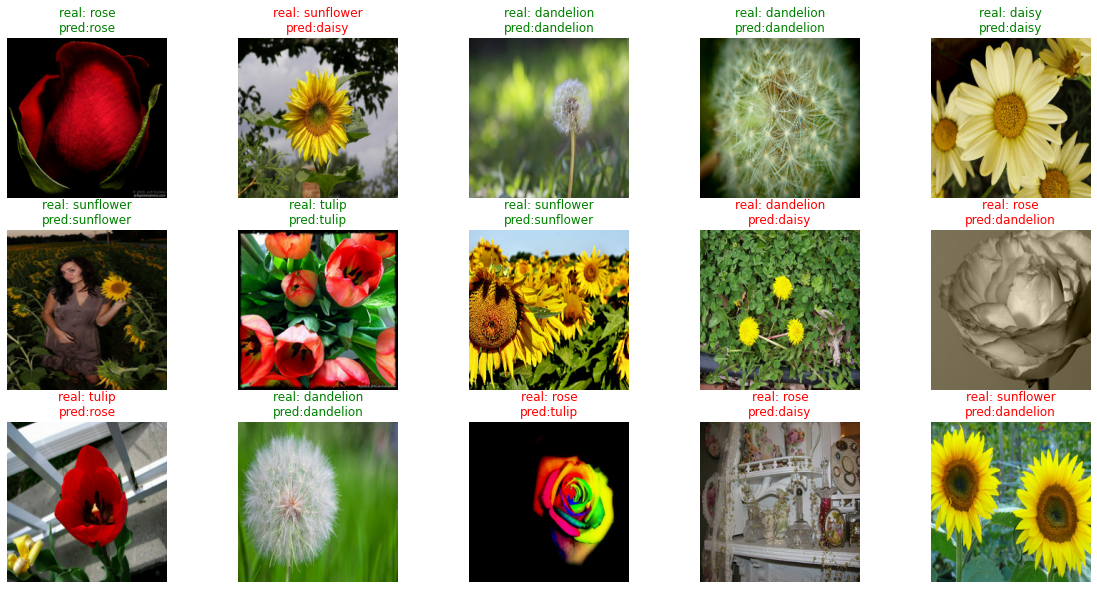

In [196]:
plot_actual_prediction(baseline_model, categories, validation_set)

Model is not performing well. Accuracy is terrible (bias is high). And generalization is bad (variance is high). 

Since the model did not accurately predict the flowers, the model didn't learn key features that differentiates the flowers (categories).

Solutions:
    * Data Augmentation
        * Create new images by augmenting the images to expose the model to more images
    * Transfer Learning
        * Use a working model that performs well for our task
    * Get more data
        * Find more data for the model

## Data Augmentation

In [197]:
# batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# IMG_RESIZE = 128

# resize_and_rescale = tf.keras.Sequential([
#   tf.keras.layers.Resizing(IMG_RESIZE, IMG_RESIZE),
#   # tf.keras.layers.Rescaling(1./255)
# ])

# out_height, out_width = 128,96

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2),
  # tf.keras.layers.RandomCrop(96, 96),
  tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
])

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
  # ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
  #             num_parallel_calls=AUTOTUNE)

  if shuffle:
    ds = ds.shuffle(1000)

  # # Batch all datasets.
  # ds = ds.batch(BATCH_SIZE)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [198]:
train_ds = prepare(training_set, shuffle=True, augment=True)
val_ds = prepare(validation_set)
# test_ds = prepare(test_ds)

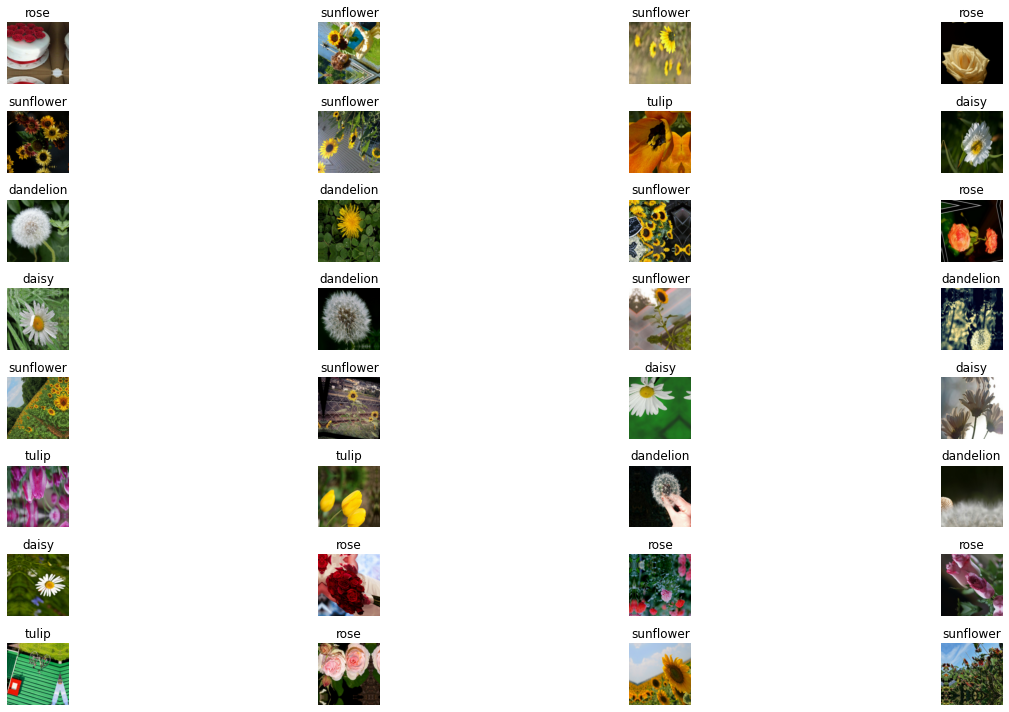

In [199]:
plt.figure(figsize=(20, 10))

for images, labels in train_ds.take(1): # take(1): takes first batch from generator 
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(categories[np.argmax(labels[i])])
        plt.axis("off")
plt.tight_layout()
plt.show()

In [200]:
augment_model = get_baseline_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                         

In [201]:
augment_history = augment_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=EPOCHS
)

Epoch 1/10
69/69 [==============================] - 109s 2s/step - loss: 1.4834 - accuracy: 0.3396 - val_loss: 1.3762 - val_accuracy: 0.4080
Epoch 2/10
69/69 [==============================] - 111s 2s/step - loss: 1.2056 - accuracy: 0.4870 - val_loss: 1.0752 - val_accuracy: 0.4991
Epoch 3/10
69/69 [==============================] - 106s 2s/step - loss: 1.0978 - accuracy: 0.5535 - val_loss: 1.0291 - val_accuracy: 0.5756
Epoch 4/10
69/69 [==============================] - 110s 2s/step - loss: 1.0458 - accuracy: 0.5872 - val_loss: 1.1031 - val_accuracy: 0.5665
Epoch 5/10
69/69 [==============================] - 105s 1s/step - loss: 0.9913 - accuracy: 0.5935 - val_loss: 0.9951 - val_accuracy: 0.5974
Epoch 6/10
69/69 [==============================] - 94s 1s/step - loss: 0.9568 - accuracy: 0.6277 - val_loss: 0.8928 - val_accuracy: 0.6412
Epoch 7/10
69/69 [==============================] - 94s 1s/step - loss: 0.9166 - accuracy: 0.6391 - val_loss: 0.8823 - val_accuracy: 0.6485
Epoch 8/10
69/6

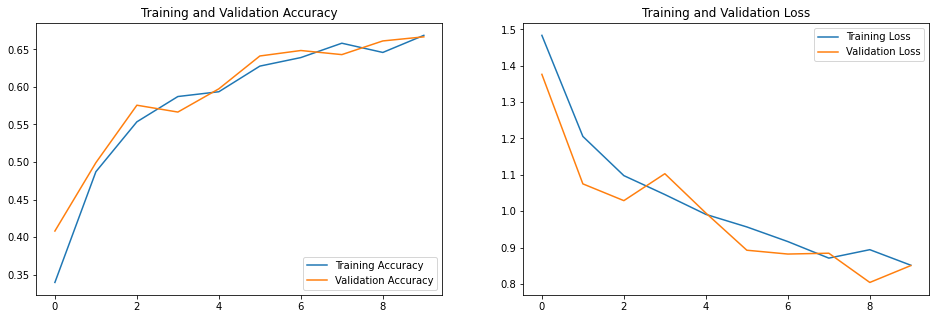

In [202]:
# Viewing the results of the training

plot_history(augment_history)

The training and validation have similar accuracy and loss (low variance). However the accuracy is ~70% (high bias). If we would like, we can do more augmentation like random contrasting.

Next we will try transfer learning. Use a model that has a great track record classifying and apply it to our task.

## Transfer Learning

In [224]:
base_transfer_model = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SIZE+ (3,),
    include_top=False,
    weights='imagenet'
)

In [ ]:
# base_transfer_model = tf.keras.applications.ResNet50(
#     weights='imagenet', 
#     include_top=False, 
#     input_shape=IMAGE_SIZE + (3,)
# )

In [225]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_transfer_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 576)


In [226]:
base_transfer_model.trainable = False

In [227]:
base_transfer_model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_3[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [228]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 576)


In [229]:
prediction_layer = tf.keras.layers.Dense(len(categories), activation='softmax')
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 5)


In [230]:
# IMG_RESIZE = 160

# resize_and_rescale = tf.keras.Sequential([
#   tf.keras.layers.Resizing(IMG_RESIZE, IMG_RESIZE),
#   tf.keras.layers.Rescaling(1./255)
# ])

# def prepare_transfer_learning_data(ds, shuffle=False):
#     ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
#               num_parallel_calls=AUTOTUNE)
#     return ds.prefetch(buffer_size=AUTOTUNE)

In [231]:
tf.keras.backend.clear_session()
inputs = tf.keras.Input(shape=(224, 224, 3))
# x = tf.keras.layers.Resizing(IMG_RESIZE, IMG_RESIZE)(inputs)
x = base_transfer_model(inputs, training=False)
x = global_average_layer(x)
outputs = prediction_layer(x)
transfer_model = tf.keras.Model(inputs, outputs)

In [232]:
transfer_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [233]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 5)                 2885      
                                                                 
Total params: 942,005
Trainable params: 2,885
Non-trainable params: 939,120
_________________________________________________________________


In [234]:
transfer_history = transfer_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=EPOCHS
)

Epoch 1/10
69/69 [==============================] - 18s 205ms/step - loss: 1.0064 - accuracy: 0.6327 - val_loss: 0.7036 - val_accuracy: 0.7559
Epoch 2/10
69/69 [==============================] - 15s 191ms/step - loss: 0.6518 - accuracy: 0.7711 - val_loss: 0.5493 - val_accuracy: 0.8324
Epoch 3/10
69/69 [==============================] - 15s 187ms/step - loss: 0.5437 - accuracy: 0.8111 - val_loss: 0.4951 - val_accuracy: 0.8452
Epoch 4/10
69/69 [==============================] - 15s 188ms/step - loss: 0.4829 - accuracy: 0.8375 - val_loss: 0.4706 - val_accuracy: 0.8415
Epoch 5/10
69/69 [==============================] - 15s 187ms/step - loss: 0.4475 - accuracy: 0.8489 - val_loss: 0.4542 - val_accuracy: 0.8506
Epoch 6/10
69/69 [==============================] - 15s 188ms/step - loss: 0.4313 - accuracy: 0.8489 - val_loss: 0.4346 - val_accuracy: 0.8525
Epoch 7/10
69/69 [==============================] - 15s 190ms/step - loss: 0.4013 - accuracy: 0.8603 - val_loss: 0.4248 - val_accuracy: 0.8561

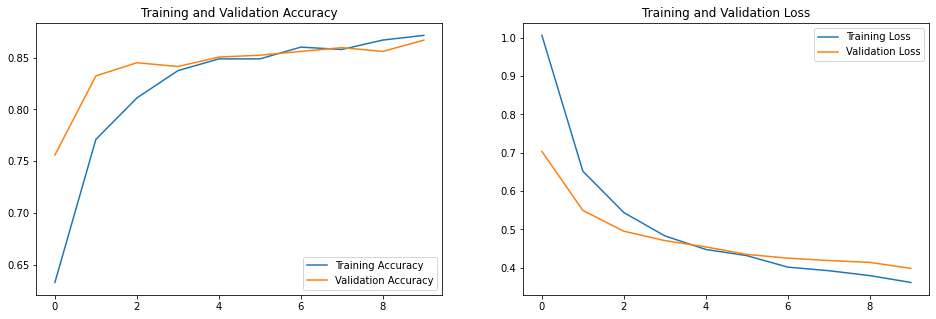

In [235]:
plot_history(transfer_history)

## GRAD-CAM

In [214]:
# def get_CAM(model, processed_image, actual_label, layer_name='block5_conv3'):
#     model_grad = tf.keras.Model([model.inputs], 
#                        [model.get_layer(layer_name).output, model.output])
    
#     with tf.GradientTape() as tape:
#         conv_output_values, predictions = model_grad(processed_image)

#         # watch the conv_output_values
#         tape.watch(conv_output_values)

#         ## Use binary cross entropy loss
#         ## actual_label is 0 if cat, 1 if dog
#         # get prediction probability of dog
#         # If model does well, 
#         # pred_prob should be close to 0 if cat, close to 1 if dog
#         pred_prob = predictions[:,1] 
        
#         # make sure actual_label is a float, like the rest of the loss calculation
#         actual_label = tf.cast(actual_label, dtype=tf.float32)
        
#         # add a tiny value to avoid log of 0
#         smoothing = 0.00001 
        
#         # Calculate loss as binary cross entropy
#         loss = tf.keras.losses.CategoricalCrossentropy(actual_label, pred_prob)
#         print(f"Categorical Crossentropy loss: {loss}")
    
#     # get the gradient of the loss with respect to the outputs of the last conv layer
#     grads_values = tape.gradient(loss, conv_output_values)
#     grads_values = tf.keras.backend.mean(grads_values, axis=(0,1,2))
    
#     conv_output_values = np.squeeze(conv_output_values.numpy())
#     grads_values = grads_values.numpy()
    
#     # weight the convolution outputs with the computed gradients
#     for i in range(512): 
#         conv_output_values[:,:,i] *= grads_values[i]
#     heatmap = np.mean(conv_output_values, axis=-1)
    
#     heatmap = np.maximum(heatmap, 0)
#     heatmap /= heatmap.max()
    
#     del model_grad, conv_output_values, grads_values, loss
   
#     return heatmap

In [215]:
# gap_weights = model.layers[-5].get_weights()[0]
# gap_weights.shape

In [216]:
# gap_weights = model.layers[-1].get_weights()[0]
# gap_weights.shape

# cam_model = tf.keras.Model(
#     inputs=model.input,
#     outputs=(model.layers[-4].output,model.layers[-1].output)
# )
# cam_model.summary()

In [217]:
# gap_weights.shape

In [218]:
# def show_cam(image_value, features, results):
#   '''
#   Displays the class activation map of an image

#   Args:
#     image_value (tensor) -- preprocessed input image with size 300 x 300
#     features (array) -- features of the image, shape (1, 37, 37, 128)
#     results (array) -- output of the sigmoid layer
#   '''

#   # there is only one image in the batch so we index at `0`
#   features_for_img = features[0]
#   prediction = results[0]

#   # there is only one unit in the output so we get the weights connected to it
#   class_activation_weights = gap_weights[:,0]

#   # upsample to the image size
#   class_activation_features = sp.ndimage.zoom(features_for_img, (IMAGE_SIZE[0]/14, IMAGE_SIZE[1]/14, 1), order=2)
  
#   # compute the intensity of each feature in the CAM
#   cam_output  = np.dot(class_activation_features, class_activation_weights)

#   # visualize the results
#   print(f'sigmoid output: {results}')
#   print(f"prediction: {'dog' if round(results[0][0]) else 'cat'}")
#   plt.figure(figsize=(8,8))
#   plt.imshow(cam_output, cmap='jet', alpha=0.5)
#   plt.imshow(tf.squeeze(image_value), alpha=0.5)
#   plt.show()

In [219]:
# for images, labels in validation_set.take(1):
#   for i in range(2):
#     # get the features and prediction
#     features, results = cam_model.predict(images)
    
#     # generate the CAM
#     show_cam(images, features, results)